In [5]:
#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.stats as stat
import scipy.stats as stats

# set figure defaults
mpl.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = [12.0/2, 8.0/2]

Adding the data for Y1, Y2, and Y3

In [6]:
# Set the font size
plt.rcParams['font.size'] = 12

# Set the font family
plt.rcParams['font.family'] = 'sans-serif'

# Optionally, you can specify the specific font you want to use
plt.rcParams['font.sans-serif'] = 'Arial'

# You can also set other font properties
plt.rcParams['font.weight'] = 'bold'

# Any other global settings for ticks, labels, titles, etc.
plt.rcParams['axes.labelsize'] = 12  # For x and y labels
plt.rcParams['axes.titlesize'] = 14  # For plot title
plt.rcParams['xtick.labelsize'] = 10 # For x-axis tick labels
plt.rcParams['ytick.labelsize'] = 10 # For y-axis tick labels

In [61]:
filename = './data/homework_1_data_Y1.csv'
Y1 = np.genfromtxt(filename, delimiter=',')
filename = './data/homework_1_data_Y2.csv'
Y2 = np.genfromtxt(filename, delimiter=',')
filename = './data/homework_1_data_Y3.csv'
Y3 = np.genfromtxt(filename, delimiter=',')


In [60]:
# the actual values of Y1, Y2, and Y3 at standard deviation 2
np.mean(Y1)+np.std(Y1) * 2, np.mean(Y2)+np.std(Y2) * 2, np.mean(Y3)+np.std(Y3) * 2

(91.88478271971249, 8.092267297015471, 7610.341404407486)

In [8]:
Y1_day_index = np.arange(0, np.size(Y1), 1) / 24
Y1_hour_index = np.arange(0, np.size(Y1), 1)
Y2_day_index = np.arange(0, np.size(Y2), 1) / 24
Y2_hour_index = np.arange(0, np.size(Y2), 1)
np.shape(Y2)
np.shape(Y3)

(637,)

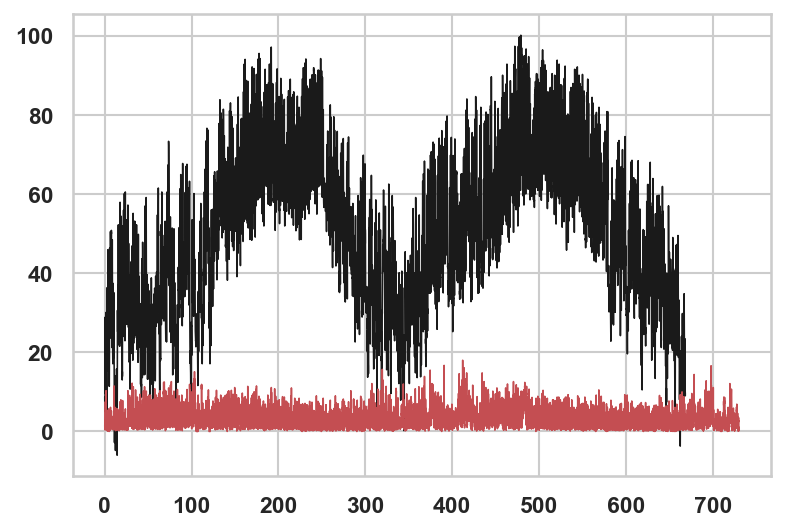

In [62]:
plt.figure()
plt.plot(Y1_day_index, Y1, linewidth=0.75, color='k')
plt.plot(Y2_day_index, Y2, linewidth=0.75, color='r')
# plt.plot(Y3, linewidth=0.75, color='b')

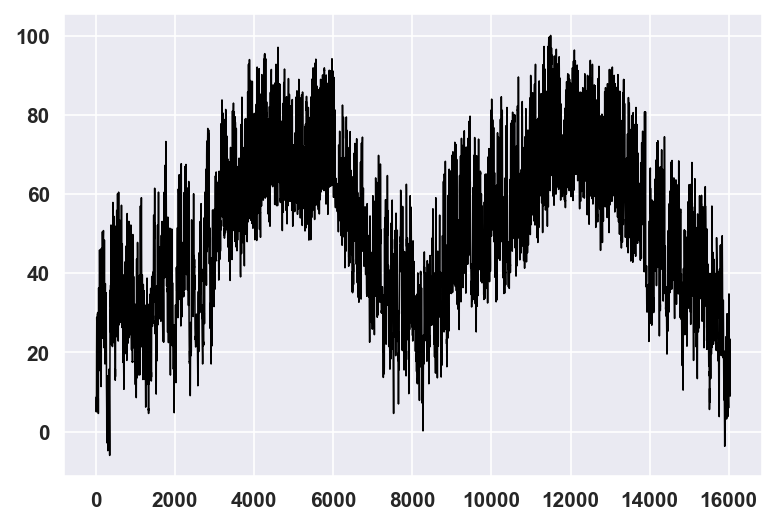

In [10]:
plt.figure()
plt.plot(Y1_hour_index, Y1, linewidth=0.75, color='k')

Standardizing the data

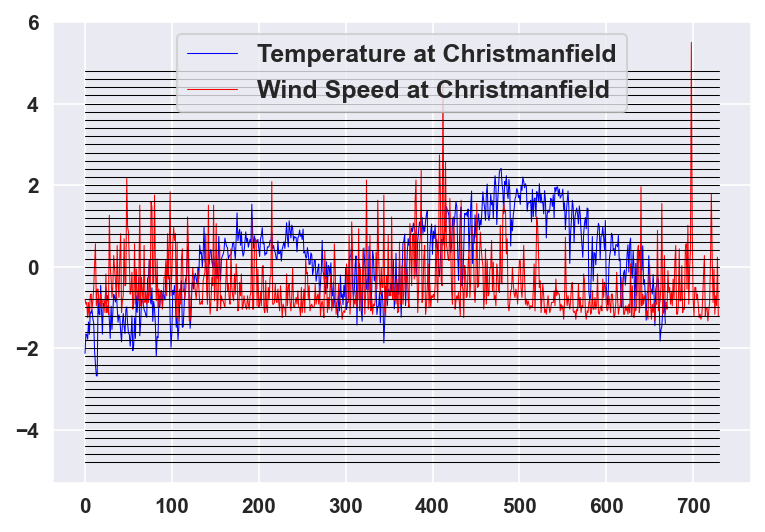

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
v1 = np.std(Y1)
v2 = np.std(Y2)
v3 = np.std(Y3)
Y1_s = (Y1 - np.mean(Y1)) / v1
Y2_s = (Y2 - np.mean(Y2)) / v2
Y3_s = (Y3 - np.mean(Y3)) / v3
plt.plot(Y1_day_index[::24], Y1_s[::24], linewidth=0.5, color='b', label= 'Temperature at Christmanfield')
plt.plot(Y2_day_index[::24], Y2_s[::24], linewidth=0.5, color='r', label= 'Wind Speed at Christmanfield')
plt.legend()
xinc = 0.2
xmin = -5
xmax = 5
bins = np.arange(xmin, xmax, xinc)
for ind, val in enumerate(bins[1:]):
    ax.plot([0, max(Y1_day_index [-1],Y2_day_index[-1])], [val, val], linewidth=0.5, color='k')

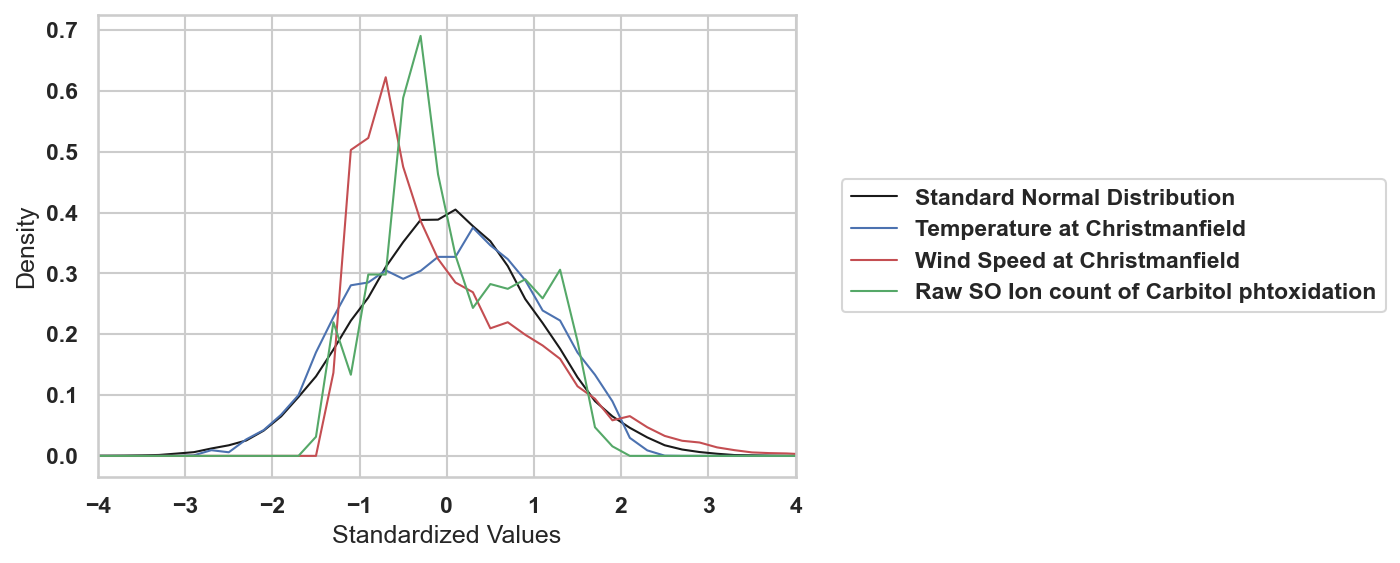

In [23]:
Z = np.random.normal(0, 1, size = (100_000,))

h_Y1_s = np.histogram(Y1_s, bins)
h_Y2_s = np.histogram(Y2_s, bins)
h_Y3_s = np.histogram(Y3_s, bins)
h_Z = np.histogram(Z, bins)

fig = plt.figure()
xvals_1 = h_Y1_s[1][:-1]
xvals_2 = h_Y2_s[1][:-1]
xvals_3 = h_Y3_s[1][:-1] 
xvals_z = h_Z[1][:-1]

fvals_Y1 = h_Y1_s[0].astype(float) / (np.size(Y1_s)*xinc)
fvals_Y2 = h_Y2_s[0].astype(float) / (np.size(Y2_s)*xinc)
fvals_Y3 = h_Y3_s[0].astype(float) / (np.size(Y3_s)*xinc)
fvals_z = h_Z[0].astype(float) / (np.size(Z)*xinc)

plt.plot(xvals_z+xinc/2, fvals_z, linewidth=1, color='k', label= 'Standard Normal Distribution')
plt.plot(xvals_1+xinc/2, fvals_Y1, linewidth=1, color='b', label= 'Temperature at Christmanfield')
plt.plot(xvals_2+xinc/2, fvals_Y2, linewidth=1, color='r', label= 'Wind Speed at Christmanfield')
plt.plot(xvals_3+xinc/2, fvals_Y3, linewidth=1, color='g', label= 'Raw SO Ion count of Carbitol phtoxidation')
#show the legend on the bottom outside of the plot
plt.legend(loc = 'center left', bbox_to_anchor=(1.05, 0.5))
# plt.legend()
plt.xlabel('Standardized Values')
plt.ylabel('Density')
plt.xlim(-4, 4)

#save the plot
plt.savefig('3-1-1.png', bbox_inches='tight')



In [13]:
[np.sum(fvals_Y1*xinc), np.sum(fvals_Y2*xinc), np.sum(fvals_Y3*xinc), np.sum(fvals_z*xinc)]

[0.9999999999999999, 0.9994292237442924, 0.9921507064364207, 1.0]

In [14]:
# integrate the density function to get the probability more than 2 standard deviations
# for Y1_s
index_Y1 = np.where(xvals_1 + xinc/2 > 2)[0]
area_Y1 = np.sum(fvals_Y1[index_Y1] * xinc)

# for Y2_s
index_Y2 = np.where(xvals_2 + xinc/2 > 2)[0]
area_Y2 = np.sum(fvals_Y2[index_Y2] * xinc)

# for Y3_s
index_Y3 = np.where(xvals_3 + xinc/2 > 2)[0]
area_Y3 = np.sum(fvals_Y3[index_Y3] * xinc)

# for Z
index_Z = np.where(xvals_z + xinc/2 > 2)[0]
area_Z = np.sum(fvals_z[index_Z] * xinc)

#print the results
# The porbability of the values being greater than 2
area_Y1, area_Y2, area_Y3, area_Z


(0.007792531637678449, 0.047031963470319633, 0.0, 0.02232)

In [24]:
# integrate the density function to get the probability more than 2 standard deviations
# for Y1_s
index_Y1 = np.where(xvals_1 + xinc/2 > 3)[0]
area_Y1 = np.sum(fvals_Y1[index_Y1] * xinc)

# for Y2_s
index_Y2 = np.where(xvals_2 + xinc/2 > 3)[0]
area_Y2 = np.sum(fvals_Y2[index_Y2] * xinc)

# for Y3_s
index_Y3 = np.where(xvals_3 + xinc/2 > 3)[0]
area_Y3 = np.sum(fvals_Y3[index_Y3] * xinc)

# for Z
index_Z = np.where(xvals_z + xinc/2 > 3)[0]
area_Z = np.sum(fvals_z[index_Z] * xinc)

#print the results
# The porbability of the values being greater than 2
area_Y1, area_Y2, area_Y3, area_Z

(0.0, 0.008618721461187214, 0.0, 0.0012800000000000003)

In [15]:

[area_Y1, np.sum(fvals_Y2*xinc), np.sum(fvals_Y3*xinc), np.sum(fvals_z*xinc)]

[0.007792531637678449, 0.9994292237442924, 0.9921507064364207, 1.0]

In [16]:
plt.figure()

hY1c = np.cumsum(h[0])
hyy = np.cumsum(hy[0])

plt.xlabel('value')
plt.ylabel('density')

plt.bar(hx[1][:-1],hxx.astype(float)/np.size(x),edgecolor = 'r', color = [], width = .3, linewidth = 2)
plt.bar(hy[1][:-1],hyy.astype(float)/np.size(y),edgecolor = 'k', color = [], width = .4, linewidth = 2)
plt.show()

NameError: name 'h' is not defined

<Figure size 900x600 with 0 Axes>

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

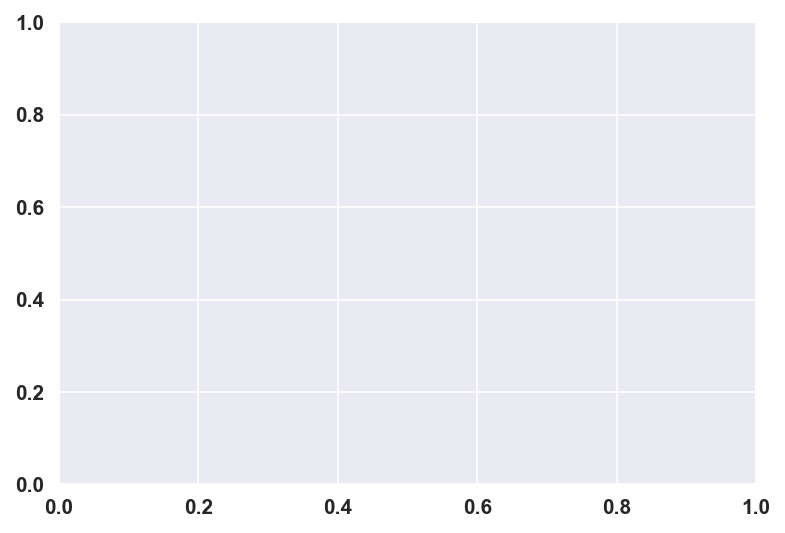

In [17]:
h_Y1_s_d = np.histogram(Y1_s, bins, density=True)
h_Y2_s_d = np.histogram(Y2_s, bins, density=True)
h_Y3_s_d = np.histogram(Y3_s, bins, density=True)
h_Z_d = np.histogram(Z, bins, density=True)

# plt.plot(xvals_z+xinc/2 , h_Z_d, linewidth=0.5, color='k', label= 'Standard Normal Distribution')
plt.plot(xvals_1+xinc/2, h_Y1_s_d, linewidth=0.5, color='b', label= 'Temperature at Christmanfield')
plt.plot(xvals_2+xinc/2, h_Y2_s_d, linewidth=0.5, color='r', label= 'Wind Speed at Christmanfield')
plt.plot(xvals_3+xinc/2, h_Y3_s_d, linewidth=0.5, color='g', label= 'Raw SO Ion count of Carbitol phtoxidation')
#show the legend on the bottom outside of the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))
# plt.legend()
plt.xlabel('Standardized Values')
plt.ylabel('Density')
plt.xlim(-4, 4)

In [ ]:
# plotting the histogram of the standardized values
fig = plt.figure()
ax = fig.add_subplot(111)
plt.hist(Y1_s, bins, alpha=0.5, color='b', label='Temperature at Christmanfield', density=True)
plt.hist(Y2_s, bins, alpha=0.5, color='r', label='Wind Speed at Christmanfield', density=True)
plt.hist(Y3_s, bins, alpha=0.5, color='g', label='Raw SO Ion count of Carbitol phtoxidation', density=True)
plt.hist(Z, bins, alpha=0.5, color='k', label='Standard Normal Distribution', density=True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.xlabel('Standardized Values')
plt.ylabel('Density')


C:\Users\masou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\masou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\masou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\masou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

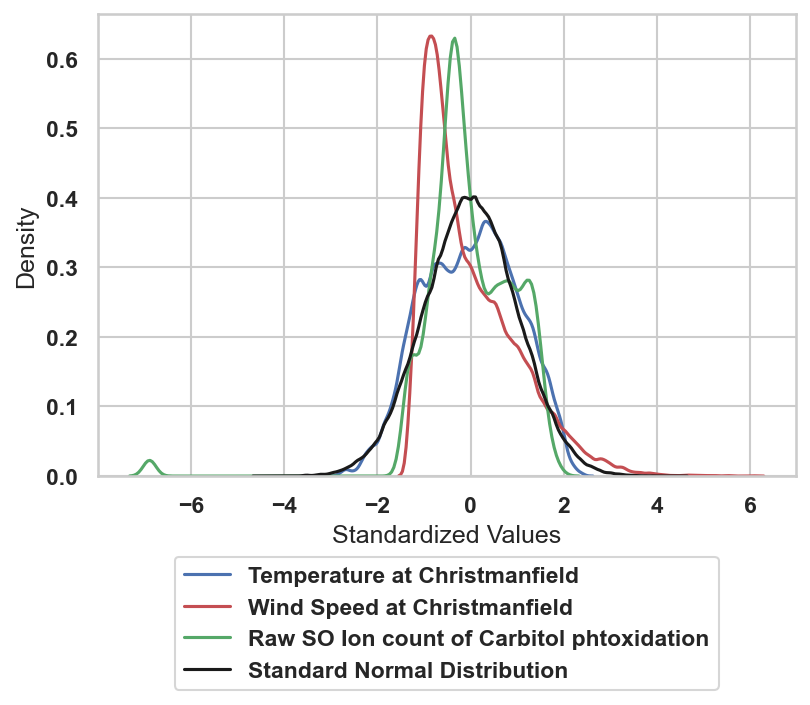

In [18]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

fig = plt.figure()
ax = fig.add_subplot(111)

# Use seaborn's distplot to plot KDEs.
# You might need to adjust the bandwidth (bw) for better smoothing.
sns.kdeplot(Y1_s, bw_adjust=0.5, color='b', label='Temperature at Christmanfield', ax=ax)
sns.kdeplot(Y2_s, bw_adjust=0.5, color='r', label='Wind Speed at Christmanfield', ax=ax)
sns.kdeplot(Y3_s, bw_adjust=0.5, color='g', label='Raw SO Ion count of Carbitol phtoxidation', ax=ax)
sns.kdeplot(Z, bw_adjust=0.5, color='k', label='Standard Normal Distribution', ax=ax)

# Adding the legend outside the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))

# Adding labels
plt.xlabel('Standardized Values')
plt.ylabel('Density')

# Show the plot
plt.show()

In [19]:
# For Y1_s
index_Y1 = np.where(xvals_1 + xinc/2 > 2)[0]
area_Y1 = np.sum(fvals_Y1[index_Y1] * xinc)

# For Y2_s
index_Y2 = np.where(xvals_2 + xinc/2 > 2)[0]
area_Y2 = np.sum(fvals_Y2[index_Y2] * xinc)

# For Y3_s
index_Y3 = np.where(xvals_3 + xinc/2 > 2)[0]
area_Y3 = np.sum(fvals_Y3[index_Y3] * xinc)

# For Z
index_Z = np.where(xvals_z + xinc/2 > 2)[0]
area_Z = np.sum(fvals_z[index_Z] * xinc)

# The porbability of the values being greater than 2
area_Y1, area_Y2, area_Y3,area_Z

(0.007792531637678449, 0.047031963470319633, 0.0, 0.02232)

In [57]:
# the mean of Y1, Y2, and Y3
np.mean(Y1), np.mean(Y2), np.mean(Y3)

(51.55786422292874, 3.232842465753425, 5896.574688901099)

(91.88478271971249, 8.092267297015471, 7610.341404407486)

In [20]:
fvals_Y1[index_Y1] * xinc

array([5.92232404e-03, 1.80786734e-03, 6.23402531e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [21]:
index_Y1

array([35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
      dtype=int64)

Problem 2

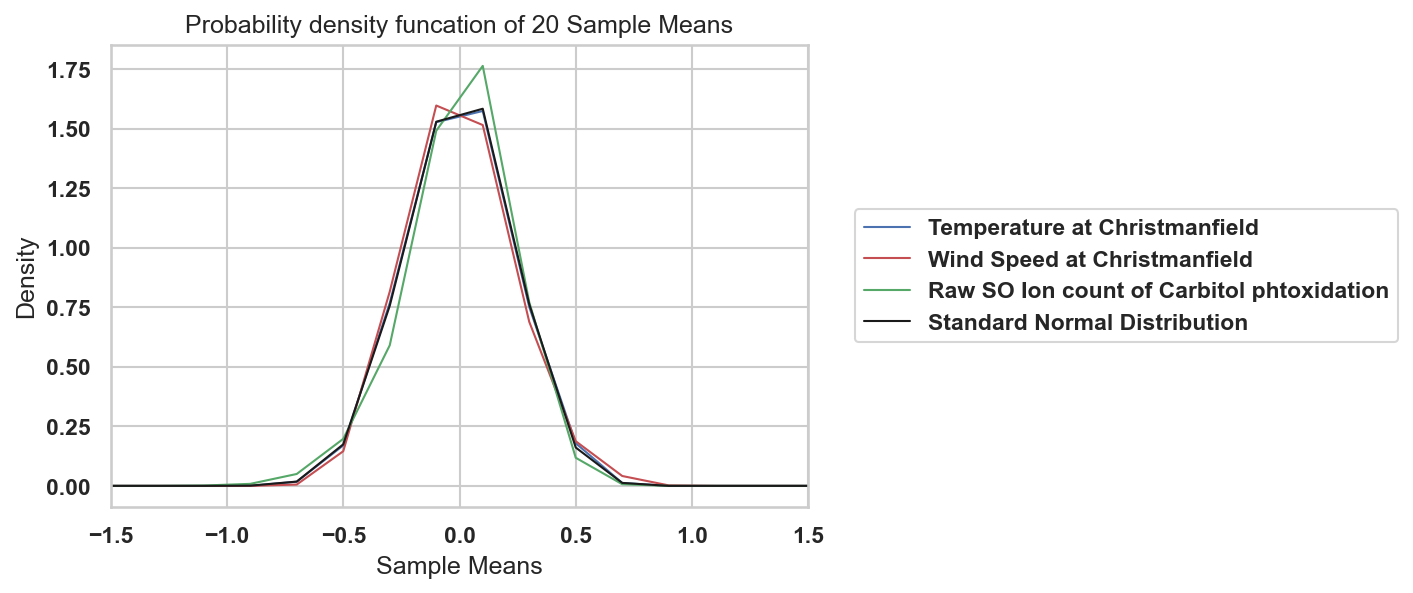

In [30]:
N = 20
# Looping thorough 10000 epxeriments 
# In each experiment, we will generate N random numbers from Y1_s, Y2_s, and Y3_s and Z
# Then we will calculate the mean of the generated numbers
# storing the results in a array
means_Y1 = np.zeros(10000)
means_Y2 = np.zeros(10000)
means_Y3 = np.zeros(10000)
means_Z = np.zeros(10000)

for i in range(10000):
    means_Y1[i] = np.mean(np.random.choice(Y1_s, N))
    means_Y2[i] = np.mean(np.random.choice(Y2_s, N))
    means_Y3[i] = np.mean(np.random.choice(Y3_s, N))
    means_Z[i] = np.mean(np.random.choice(Z, N))



# The standard deviation of the sample means is the standard deviation of the population divided by the square root of the sample size
std_Y1_means_20 = v1 / np.sqrt(N)
std_Y2_means_20 = v2 / np.sqrt(N)
std_Y3_means_20 = v3 / np.sqrt(N)
std_Z_means_20 = 1 / np.sqrt(N)

# The mean of the sample means is the mean of the population
mean_Y1_means_20 = np.mean(means_Y1)
mean_Y2_means_20 = np.mean(means_Y2)
mean_Y3_means_20 = np.mean(means_Y3)
mean_Z_means_20 = np.mean(means_Z)

# plotting the pdf of the sample means with line
fig = plt.figure()
ax = fig.add_subplot(111)
h_Y1_means_20 = np.histogram(means_Y1, bins)
h_Y2_means_20 = np.histogram(means_Y2, bins)
h_Y3_means_20 = np.histogram(means_Y3, bins)
h_Z_means_20 = np.histogram(means_Z, bins)

xvals_Y1_means_20 = h_Y1_means_20[1][:-1]
xvals_Y2_means_20 = h_Y2_means_20[1][:-1]
xvals_Y3_means_20 = h_Y3_means_20[1][:-1]
xvals_Z_means_20 = h_Z_means_20[1][:-1]

fvals_Y1_means_20 = h_Y1_means_20[0].astype(float) / (np.size(means_Y1)*xinc)
fvals_Y2_means_20 = h_Y2_means_20[0].astype(float) / (np.size(means_Y2)*xinc)
fvals_Y3_means_20 = h_Y3_means_20[0].astype(float) / (np.size(means_Y3)*xinc)
fvals_Z_means_20 = h_Z_means_20[0].astype(float) / (np.size(means_Z)*xinc)

plt.plot(xvals_Y1_means_20+xinc/2, fvals_Y1_means_20, linewidth=1, color='b', label= 'Temperature at Christmanfield')
plt.plot(xvals_Y2_means_20+xinc/2, fvals_Y2_means_20, linewidth=1, color='r', label= 'Wind Speed at Christmanfield')
plt.plot(xvals_Y3_means_20+xinc/2, fvals_Y3_means_20, linewidth=1, color='g', label= 'Raw SO Ion count of Carbitol phtoxidation')
plt.plot(xvals_Z_means_20+xinc/2, fvals_Z_means_20, linewidth=1, color='k', label= 'Standard Normal Distribution')
plt.legend(loc = 'center left', bbox_to_anchor=(1.05, 0.5))
plt.xlabel('Sample Means')
plt.ylabel('Density')
plt.xlim(-1.5, 1.5)
plt.title('Probability density funcation of 20 Sample Means')
#save the plot
plt.savefig('3-2-2.png', bbox_inches='tight')



# finding the frequency of the sample means being less than -0.35 using Central Limit Theorem






In [31]:
# finding the frequency of the sample means being less than -0.35 using Central Limit Theorem
# integrating the density function to get the probability of the sample means being less than -0.35
# for Y1_s
index_Y1 = np.where(xvals_Y1_means_20 + xinc/2 < -0.35)[0]
area_Y1_mean = np.sum(fvals_Y1_means_20[index_Y1] * xinc)
area_Y1_mean

0.037500000000000006

In [32]:
# Define the value for integration limit
limit = -0.35

# Function to integrate the histogram up to a certain point
def integrate_histogram(xvals, fvals, xinc, limit):
    total_area = 0
    for x, f in zip(xvals, fvals):
        if x + xinc/2 <= limit:
            total_area += f * xinc
        else:
            # Stop if the bin exceeds the limit
            break
    return total_area

# Integrate the histograms up to -0.35
prob_Y1_less_than_limit = integrate_histogram(xvals_Y1_means_20, fvals_Y1_means_20, xinc, limit)
prob_Y2_less_than_limit = integrate_histogram(xvals_Y2_means_20, fvals_Y2_means_20, xinc, limit)
prob_Y3_less_than_limit = integrate_histogram(xvals_Y3_means_20, fvals_Y3_means_20, xinc, limit)
prob_Z_less_than_limit = integrate_histogram(xvals_Z_means_20, fvals_Z_means_20, xinc, limit)

print("Probability of Y1 sample means being less than -0.35:", prob_Y1_less_than_limit)
print("Probability of Y2 sample means being less than -0.35:", prob_Y2_less_than_limit)
print("Probability of Y3 sample means being less than -0.35:", prob_Y3_less_than_limit)
print("Probability of Z sample means being less than -0.35:", prob_Z_less_than_limit)

Probability of Y1 sample means being less than -0.35: 0.037500000000000006
Probability of Y2 sample means being less than -0.35: 0.0302
Probability of Y3 sample means being less than -0.35: 0.05150000000000001
Probability of Z sample means being less than -0.35: 0.0387


In [33]:
np.arange(5,60,5)

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


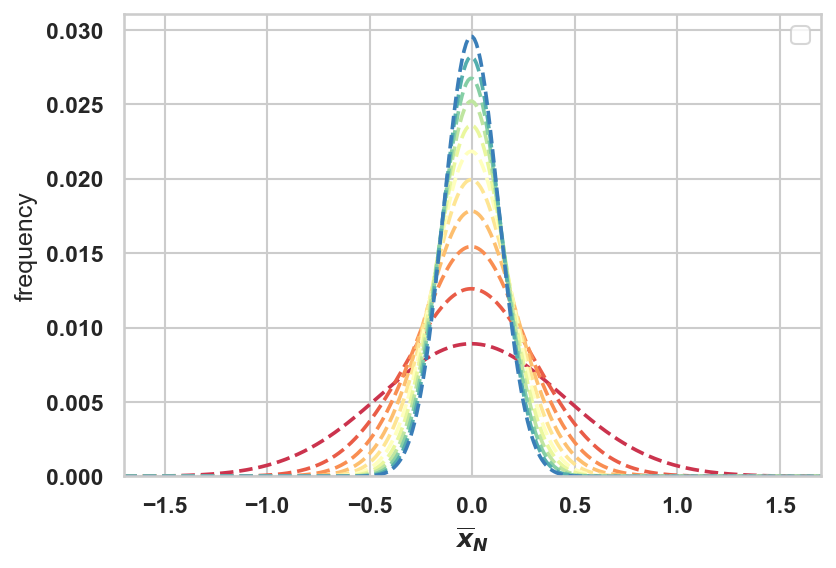

In [36]:
bin_width = .01
#N 5 to 60 in steps of 5
for N in np.arange(5,60,5):

    Y1_pdf = []
    #set the color for all N using clr
    clr = plt.get_cmap('Spectral')(N/60)
    
        
    # if(N == 5):
    #     clr = 'black'
    # elif(N==25):
    #     clr = 'cornflowerblue'
    # elif(N==100):
    #     clr = 'magenta'
        
    
    for i in np.arange(0,10000): #rinse and repeat 10,000 times
    
        Y1_pdf.append(np.mean(np.random.normal(loc = 0, scale = 1., size = N)))  #here I am drawing the samples of size N      
    
    # calc histograms
    bins = np.arange(-8,8,bin_width)
    y2hist, x = np.histogram(Y1_pdf, bins = bins)
    
    x = bins[0:-1]
    # plt.plot(x,y2hist/(float(len(y2))), alpha=0.5, color = clr, label = 'N = ' + str(N))
    plt.plot(x,(bin_width)*stats.norm.pdf(x+bin_width/2, loc = 0, scale = 1./np.sqrt(N)), 
             color = clr, linestyle = '--', linewidth = 1.75)
    
plt.legend()
plt.xticks(np.arange(-10,10,2))
plt.xticks(np.arange(-2,2,.5))
plt.xlim(-1.7,1.7)

ymin, ymax = plt.gca().get_ylim()
plt.ylim(0,ymax)

plt.xlabel(r'$\overline{x}_N$')
plt.ylabel('frequency')

plt.show()

In [ ]:
# Looping thorough 10000 epxeriments 
# In each experiment, we will generate N random numbers from Y1_s, Y2_s, and Y3_s and Z
# Then we will calculate the mean of the generated numbers
# storing the results in a array
means_Y1 = np.zeros(10000)
means_Y2 = np.zeros(10000)
means_Y3 = np.zeros(10000)
means_Z = np.zeros(10000)

for i in range(10000):
    means_Y1[i] = np.mean(np.random.choice(Y1_s, N))
    means_Y2[i] = np.mean(np.random.choice(Y2_s, N))
    means_Y3[i] = np.mean(np.random.choice(Y3_s, N))
    means_Z[i] = np.mean(np.random.choice(Z, N))



# The standard deviation of the sample means is the standard deviation of the population divided by the square root of the sample size
std_Y1_means_20 = v1 / np.sqrt(N)
std_Y2_means_20 = v2 / np.sqrt(N)
std_Y3_means_20 = v3 / np.sqrt(N)
std_Z_means_20 = 1 / np.sqrt(N)

# The mean of the sample means is the mean of the population
mean_Y1_means_20 = np.mean(means_Y1)
mean_Y2_means_20 = np.mean(means_Y2)
mean_Y3_means_20 = np.mean(means_Y3)
mean_Z_means_20 = np.mean(means_Z)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


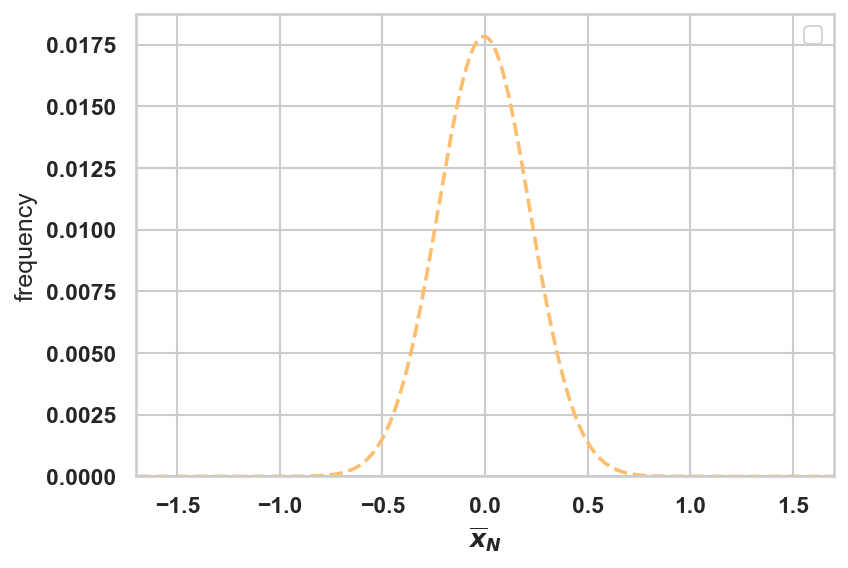

In [37]:
bin_width = .01
#N 5 to 60 in steps of 5
for N in [20]:

    Y1_pdf = []
    #set the color for all N using clr
    clr = plt.get_cmap('Spectral')(N/60)
    
        
    # if(N == 5):
    #     clr = 'black'
    # elif(N==25):
    #     clr = 'cornflowerblue'
    # elif(N==100):
    #     clr = 'magenta'
        
    
    for i in np.arange(0,10000): #rinse and repeat 10,000 times
    
        Y1_pdf.append(np.mean(np.random.normal(loc = 0, scale = 1., size = N)))  #here I am drawing the samples of size N      
        
    # calc histograms
    bins = np.arange(-8,8,bin_width)
    y2hist, x = np.histogram(Y1_pdf, bins = bins)
    
    x = bins[0:-1]
    # plt.plot(x,y2hist/(float(len(y2))), alpha=0.5, color = clr, label = 'N = ' + str(N))
    plt.plot(x,(bin_width)*stats.norm.pdf(x+bin_width/2, loc = 0, scale = 1./np.sqrt(N)), 
             color = clr, linestyle = '--', linewidth = 1.75)
    
plt.legend()
plt.xticks(np.arange(-10,10,2))
plt.xticks(np.arange(-2,2,.5))
plt.xlim(-1.7,1.7)

ymin, ymax = plt.gca().get_ylim()
plt.ylim(0,ymax)

plt.xlabel(r'$\overline{x}_N$')
plt.ylabel('frequency')

plt.show()

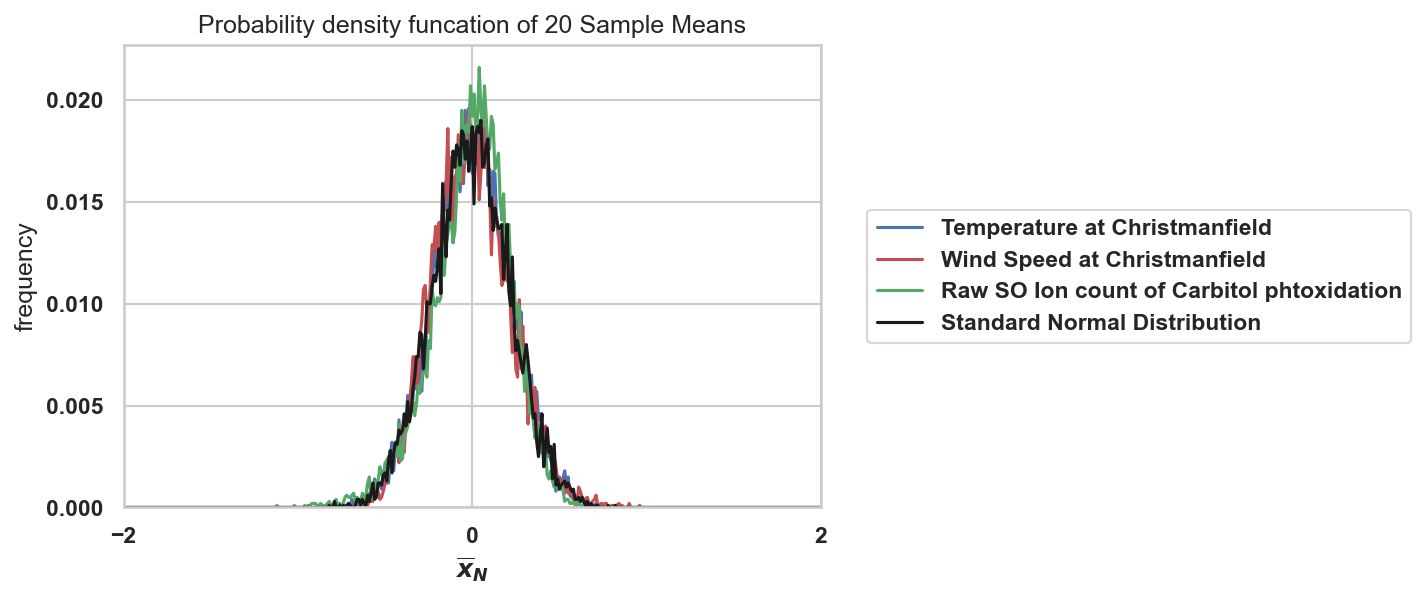

In [48]:
for N in [20]:

    y1, y2, y3, y4 = [], [], [], []
    
    # for i in np.arange(0,10000):
    # 
    #     # # drawing samples here
    #     y1.append(np.mean(np.random.chisquare(3., size = N)))
    #     y2.append(np.mean(np.random.normal(loc = 0, scale = 1., size = N)))    
    #     y3.append(np.mean(np.random.lognormal(mean = 0, sigma = 1, size = N)))
    #     y4.append(np.mean(np.random.uniform(low = -5, high = 5, size = N)))
    
    for i in range(10000):
        y1.append(np.mean(np.random.choice(Y1_s, N)))
        y2.append(np.mean(np.random.choice(Y2_s, N)))
        y3.append(np.mean(np.random.choice(Y3_s, N)))
        y4.append(np.mean(np.random.choice(Z, N)))
                      
    # compute the theoretical POPULATION standard deviation
    sigma_y1 = np.std(np.random.chisquare(3., size = 100_000))
    sigma_y2 = np.std(np.random.normal(loc = 0, scale = 1, size = 100_000))
    sigma_y3 = np.std(np.random.lognormal(mean = 0, sigma = 1, size = 100_000))
    sigma_y4 = np.std(np.random.uniform(low = -5, high = 5, size = 100_000))
    
    # calc histograms
    bins = np.arange(-8,8,bin_width)
    y1hist, x = np.histogram(y1,bins = bins)
    y2hist, x = np.histogram(y2,bins = bins)
    y3hist, x = np.histogram(y3,bins = bins)
    y4hist, x = np.histogram(y4,bins = bins)
    
    x = bins[0:-1]
    
    



    
    plt.plot(x,y1hist/(float(len(y2))),alpha=1, color = 'b', label = 'Temperature at Christmanfield')
    plt.plot(x,y2hist/(float(len(y2))),alpha=1, color = 'r', label = 'Wind Speed at Christmanfield')
    plt.plot(x,y3hist/(float(len(y3))),alpha=1, color = 'g', label = 'Raw SO Ion count of Carbitol phtoxidation')
    plt.plot(x,y4hist/(float(len(y4))),alpha=1, color = 'k', label = 'Standard Normal Distribution')
    
    if(N>=0):
        #assuming you know the underlying population standard deviation for the normal
        #norm_std = 1. 
        #assuming you estimate the standard deviation from the sample for the normal example
        norm_std =  np.std(np.random.normal(loc = 0, scale = 1., size = N))  
        
        # plt.plot(x,(bin_width)*stats.norm.pdf(x+bin_width/2, loc = np.mean(y2), scale = sigma_y2/np.sqrt(N)), 
        #          color = 'black', linestyle = '--', linewidth = 1.75)
        # plt.plot(x,(bin_width)*stats.norm.pdf(x+bin_width/2, loc = np.mean(y3), scale = sigma_y3/np.sqrt(N)), 
        #          color = 'cornflowerblue', linestyle = '--', linewidth = 1.75)
        # plt.plot(x,(bin_width)*stats.norm.pdf(x+bin_width/2, loc = np.mean(y4), scale = sigma_y4/np.sqrt(N)), 
        #          color = 'magenta', linestyle = '--', linewidth = 1.75)    
    
    plt.xticks(np.arange(-10,10,2))
    plt.xlim(-2,2)
    ymin, ymax = plt.gca().get_ylim()
    plt.ylim(0,ymax)

    textprint = r'$\overline{x}_{N}$'
    plt.xlabel(textprint)
    plt.ylabel('frequency')
    
    plt.title('N = ' + str(N) + '\ntheory=dashed, solid=samples')
    plt.legend()
    
    plt.legend(loc = 'center left', bbox_to_anchor=(1.05, 0.5))
    # plt.xlabel('Sample Means')
    # plt.ylabel('Density')
    # plt.xlim(-1.5, 1.5)
    plt.title('Probability density funcation of 20 Sample Means')
    # #save the plot
    plt.savefig('2-2.png', bbox_inches='tight')
       
    plt.show()

In [46]:
for N in [20]:

    y1, y2, y3, y4 = [], [], [], []
    
    # for i in np.arange(0,10000):
    # 
    #     # # drawing samples here
    #     y1.append(np.mean(np.random.chisquare(3., size = N)))
    #     y2.append(np.mean(np.random.normal(loc = 0, scale = 1., size = N)))    
    #     y3.append(np.mean(np.random.lognormal(mean = 0, sigma = 1, size = N)))
    #     y4.append(np.mean(np.random.uniform(low = -5, high = 5, size = N)))
    
    for i in range(10000):
        y1.append(np.mean(np.random.choice(Y1_s, N)))
        y2.append(np.mean(np.random.choice(Y2_s, N)))
        y3.append(np.mean(np.random.choice(Y3_s, N)))
        y4.append(np.mean(np.random.choice(Z, N)))
                      
    # compute the theoretical POPULATION standard deviation
    sigma_y1 = np.std(np.random.chisquare(3., size = 100_000))
    sigma_y2 = np.std(np.random.normal(loc = 0, scale = 1, size = 100_000))
    sigma_y3 = np.std(np.random.lognormal(mean = 0, sigma = 1, size = 100_000))
    sigma_y4 = np.std(np.random.uniform(low = -5, high = 5, size = 100_000))
    
    # calc histograms
    bins = np.arange(-8,8,bin_width)
    y1hist, x = np.histogram(y1,bins = bins)
    y2hist, x = np.histogram(y2,bins = bins)
    y3hist, x = np.histogram(y3,bins = bins)
    y4hist, x = np.histogram(y4,bins = bins)
    
    x = bins[0:-1]
    
    



    
    plt.plot(x,y1hist/(float(len(y2))),alpha=1, color = 'b', label = 'Temperature at Christmanfield')
    plt.plot(x,y2hist/(float(len(y2))),alpha=1, color = 'r', label = 'Wind Speed at Christmanfield')
    plt.plot(x,y3hist/(float(len(y3))),alpha=1, color = 'g', label = 'Raw SO Ion count of Carbitol phtoxidation')
    plt.plot(x,y4hist/(float(len(y4))),alpha=1, color = 'k', label = 'Standard Normal Distribution')
    
    if(N>=0):
        #assuming you know the underlying population standard deviation for the normal
        #norm_std = 1. 
        #assuming you estimate the standard deviation from the sample for the normal example
        norm_std =  np.std(np.random.normal(loc = 0, scale = 1., size = N))  
        
        # plt.plot(x,(bin_width)*stats.norm.pdf(x+bin_width/2, loc = np.mean(y2), scale = sigma_y2/np.sqrt(N)), 
        #          color = 'black', linestyle = '--', linewidth = 1.75)
        # plt.plot(x,(bin_width)*stats.norm.pdf(x+bin_width/2, loc = np.mean(y3), scale = sigma_y3/np.sqrt(N)), 
        #          color = 'cornflowerblue', linestyle = '--', linewidth = 1.75)
        # plt.plot(x,(bin_width)*stats.norm.pdf(x+bin_width/2, loc = np.mean(y4), scale = sigma_y4/np.sqrt(N)), 
        #          color = 'magenta', linestyle = '--', linewidth = 1.75)    
    
    plt.xticks(np.arange(-10,10,2))
    plt.xlim(-2,2)
    ymin, ymax = plt.gca().get_ylim()
    plt.ylim(0,ymax)

    textprint = r'$\overline{x}_{N}$'
    plt.xlabel(textprint)
    plt.ylabel('frequency')
    
    plt.title('N = ' + str(N) + '\ntheory=dashed, solid=samples')
    plt.legend()
    
    plt.legend(loc = 'center left', bbox_to_anchor=(1.05, 0.5))
    # plt.xlabel('Sample Means')
    # plt.ylabel('Density')
    # plt.xlim(-1.5, 1.5)
    plt.title('Probability density funcation of 20 Sample Means')
    # #save the plot
    plt.savefig('2-2.png', bbox_inches='tight')
       
    plt.show()

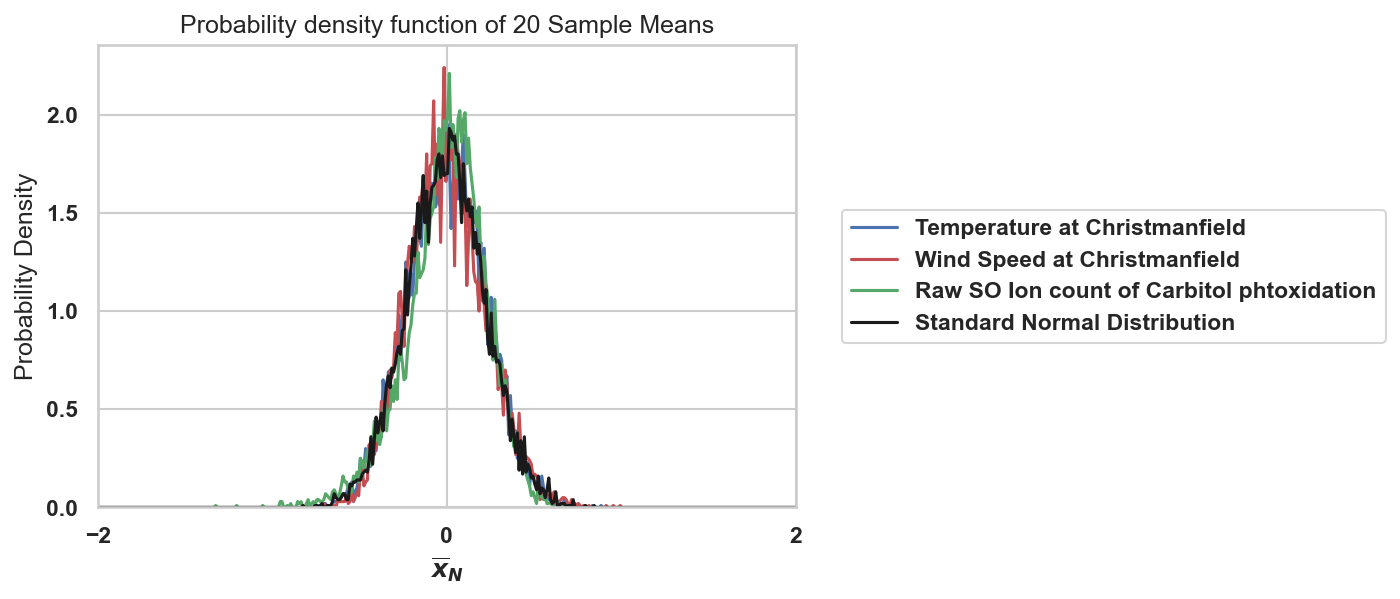

In [50]:
for N in [20]:
    y1, y2, y3, y4 = [], [], [], []
    
    for i in range(10000):
        y1.append(np.mean(np.random.choice(Y1_s, N)))
        y2.append(np.mean(np.random.choice(Y2_s, N)))
        y3.append(np.mean(np.random.choice(Y3_s, N)))
        y4.append(np.mean(np.random.choice(Z, N)))
                      
    # compute the theoretical POPULATION standard deviation
    sigma_y1 = np.std(np.random.chisquare(3., size = 100_000))
    sigma_y2 = np.std(np.random.normal(loc = 0, scale = 1, size = 100_000))
    sigma_y3 = np.std(np.random.lognormal(mean = 0, sigma = 1, size = 100_000))
    sigma_y4 = np.std(np.random.uniform(low = -5, high = 5, size = 100_000))
    
    # calc histograms and normalize to get PDF
    y1hist, bins = np.histogram(y1, bins=np.arange(-8, 8, bin_width), density=True)
    y2hist, bins = np.histogram(y2, bins=np.arange(-8, 8, bin_width), density=True)
    y3hist, bins = np.histogram(y3, bins=np.arange(-8, 8, bin_width), density=True)
    y4hist, bins = np.histogram(y4, bins=np.arange(-8, 8, bin_width), density=True)
    
    x = bins[:-1] + bin_width / 2  # Centers of bins
    
    plt.plot(x, y1hist, alpha=1, color='b', label='Temperature at Christmanfield')
    plt.plot(x, y2hist, alpha=1, color='r', label='Wind Speed at Christmanfield')
    plt.plot(x, y3hist, alpha=1, color='g', label='Raw SO Ion count of Carbitol phtoxidation')
    plt.plot(x, y4hist, alpha=1, color='k', label='Standard Normal Distribution')
    
    if N >= 0:
        # Assuming you estimate the standard deviation from the sample for the normal example
        norm_std = np.std(np.random.normal(loc=0, scale=1., size=N))
        # Theoretical normal PDFs could be plotted here if necessary
        
    plt.xticks(np.arange(-10, 10, 2))
    plt.xlim(-2, 2)
    ymin, ymax = plt.gca().get_ylim()
    plt.ylim(0, ymax)

    textprint = r'$\overline{x}_{N}$'
    plt.xlabel(textprint)
    plt.ylabel('Probability Density')
    
    plt.title('Probability density function of 20 Sample Means')
    plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
    
    plt.savefig('2-2.png', bbox_inches='tight')
    plt.show()

In [ ]:
for N in [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]:
    y1, y2, y3, y4 = [], [], [], []
    
    for i in range(10000):
        y1.append(np.mean(np.random.choice(Y1_s, N)))
        y2.append(np.mean(np.random.choice(Y2_s, N)))
        y3.append(np.mean(np.random.choice(Y3_s, N)))
        y4.append(np.mean(np.random.choice(Z, N)))
                      
    # compute the theoretical POPULATION standard deviation
    sigma_y1 = np.std(np.random.chisquare(3., size = 100_000))
    sigma_y2 = np.std(np.random.normal(loc = 0, scale = 1, size = 100_000))
    sigma_y3 = np.std(np.random.lognormal(mean = 0, sigma = 1, size = 100_000))
    sigma_y4 = np.std(np.random.uniform(low = -5, high = 5, size = 100_000))
    
    # calc histograms and normalize to get PDF
    y1hist, bins = np.histogram(y1, bins=np.arange(-8, 8, bin_width), density=True)
    y2hist, bins = np.histogram(y2, bins=np.arange(-8, 8, bin_width), density=True)
    y3hist, bins = np.histogram(y3, bins=np.arange(-8, 8, bin_width), density=True)
    y4hist, bins = np.histogram(y4, bins=np.arange(-8, 8, bin_width), density=True)
    
    x = bins[:-1] + bin_width / 2  # Centers of bins
    
    plt.plot(x, y1hist, alpha=1, color='b', label='Temperature at Christmanfield')
    plt.plot(x, y2hist, alpha=1, color='r', label='Wind Speed at Christmanfield')
    plt.plot(x, y3hist, alpha=1, color='g', label='Raw SO Ion count of Carbitol phtoxidation')
    plt.plot(x, y4hist, alpha=1, color='k', label='Standard Normal Distribution')
    
    if N >= 0:
        # Assuming you estimate the standard deviation from the sample for the normal example
        norm_std = np.std(np.random.normal(loc=0, scale=1., size=N))
        # Theoretical normal PDFs could be plotted here if necessary
        
    plt.xticks(np.arange(-10, 10, 2))
    plt.xlim(-2, 2)
    ymin, ymax = plt.gca().get_ylim()
    plt.ylim(0, ymax)

    textprint = r'$\overline{x}_{N}$'
    plt.xlabel(textprint)
    plt.ylabel('Probability Density')
    
    plt.title('Probability density function of 20 Sample Means')
    plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
    
    plt.savefig('2-2.png', bbox_inches='tight')
    plt.show()

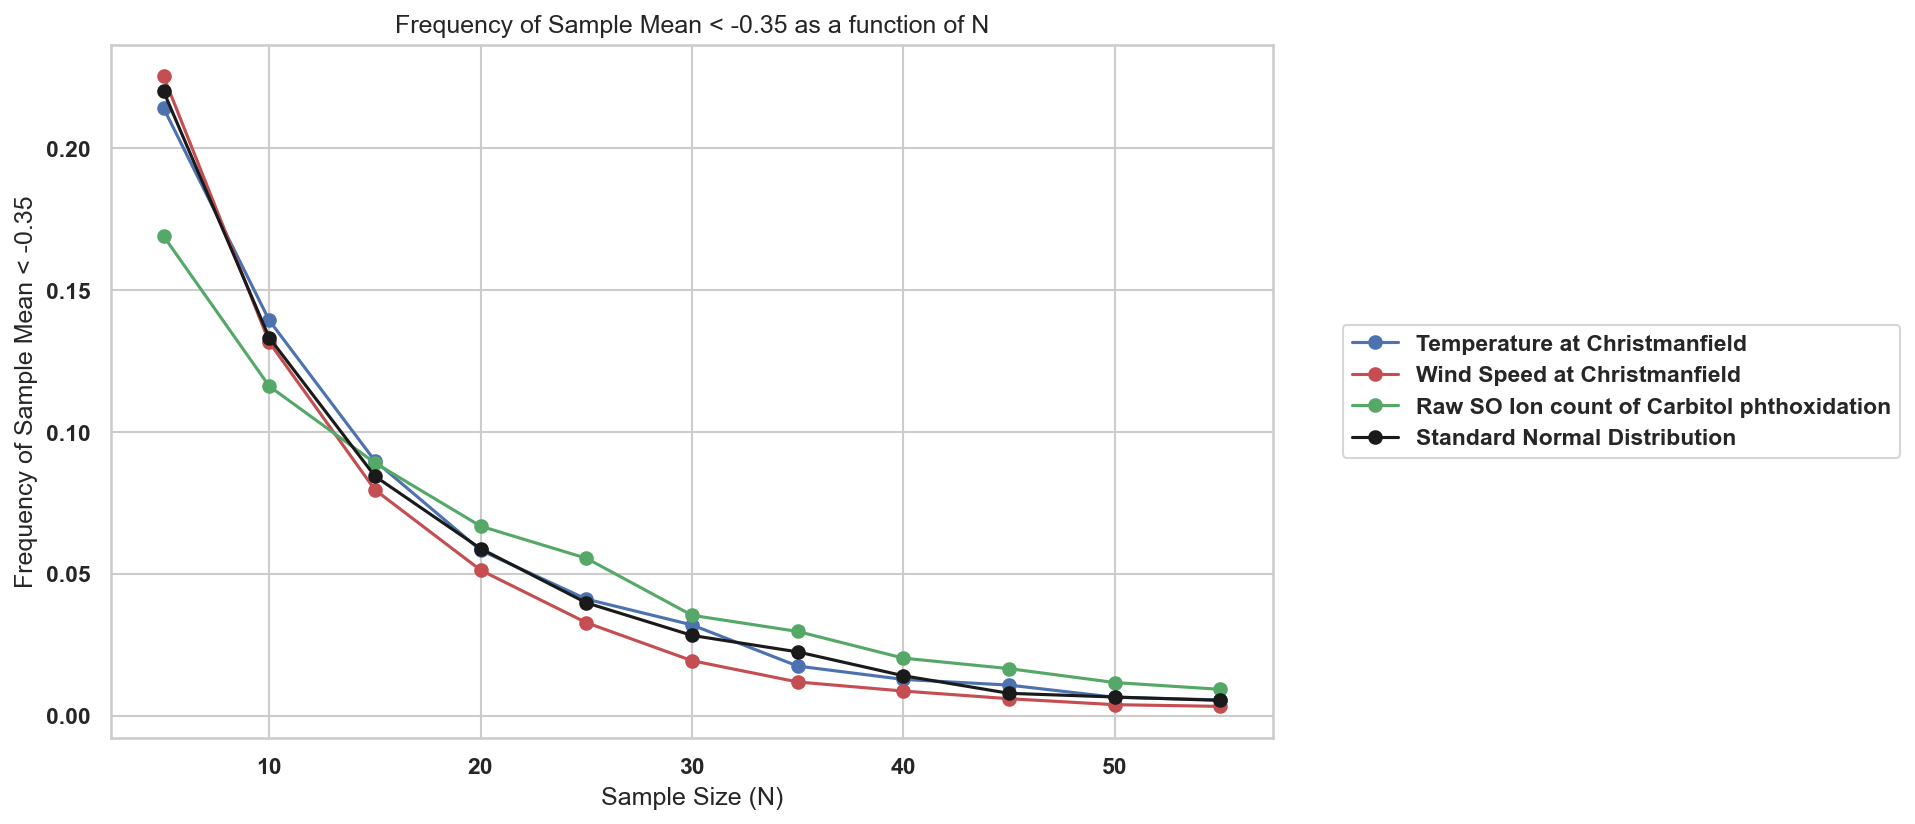

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming Y1_s, Y2_s, Y3_s, Z and bin_width are defined somewhere in your code

# Initialize lists to hold the frequencies
freq_y1, freq_y2, freq_y3, freq_y4 = [], [], [], []

Ns = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]

for N in Ns:
    y1, y2, y3, y4 = [], [], [], []
    count_y1, count_y2, count_y3, count_y4 = 0, 0, 0, 0  # Counters for each series
    
    for i in range(10000):
        sample_y1 = np.mean(np.random.choice(Y1_s, N))
        sample_y2 = np.mean(np.random.choice(Y2_s, N))
        sample_y3 = np.mean(np.random.choice(Y3_s, N))
        sample_y4 = np.mean(np.random.choice(Z, N))
        
        y1.append(sample_y1)
        y2.append(sample_y2)
        y3.append(sample_y3)
        y4.append(sample_y4)
        
        if sample_y1 < -0.35:
            count_y1 += 1
        if sample_y2 < -0.35:
            count_y2 += 1
        if sample_y3 < -0.35:
            count_y3 += 1
        if sample_y4 < -0.35:
            count_y4 += 1
    
    # Record the frequency for this N
    freq_y1.append(count_y1 / 10000)
    freq_y2.append(count_y2 / 10000)
    freq_y3.append(count_y3 / 10000)
    freq_y4.append(count_y4 / 10000)
    
    # ... (rest of your histogram and plotting code) ...

# After the loop, plot the frequencies
plt.figure(figsize=(10, 6))
plt.plot(Ns, freq_y1, marker='o', color='b', label='Temperature at Christmanfield')
plt.plot(Ns, freq_y2, marker='o', color='r', label='Wind Speed at Christmanfield')
plt.plot(Ns, freq_y3, marker='o', color='g', label='Raw SO Ion count of Carbitol phthoxidation')
plt.plot(Ns, freq_y4, marker='o', color='k', label='Standard Normal Distribution')
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.xlabel('Sample Size (N)')
plt.ylabel('Frequency of Sample Mean < -0.35')
plt.title('Frequency of Sample Mean < -0.35 as a function of N')
plt.grid(True)
plt.savefig('2-2.png', bbox_inches='tight')
plt.show()